# Linear regression for converting binary to decimal

In [1]:
import numpy as np

In [2]:
X = np.matrix([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = [0,1,2,3,4,5,6,7]
print X
print y

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0, 1, 2, 3, 4, 5, 6, 7]


In [3]:
print X.shape
print len(y)

(8, 3)
8


In [4]:
for count, instance  in enumerate(X):
    print instance, '--->', count

[[0 0 0]] ---> 0
[[0 0 1]] ---> 1
[[0 1 0]] ---> 2
[[0 1 1]] ---> 3
[[1 0 0]] ---> 4
[[1 0 1]] ---> 5
[[1 1 0]] ---> 6
[[1 1 1]] ---> 7


In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X, y)
# Make predictions using the testing set
y_pred = regr.predict(X)

In [110]:
y_pred

array([  4.44089210e-16,   1.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
         6.00000000e+00,   7.00000000e+00])

In [6]:
regr.coef_

array([ 4.,  2.,  1.])

# Logistic regression for classifying the binary values above 3

In [7]:
X = np.matrix([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = [0,0,0,0,1,1,1,1]
print X
print y

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0, 0, 0, 0, 1, 1, 1, 1]


In [8]:
print X.shape
print len(y)

(8, 3)
8


In [9]:
for count, instance, label in zip(range(len(y)),X,y):
    print instance, '--->', count, '--->', label

[[0 0 0]] ---> 0 ---> 0
[[0 0 1]] ---> 1 ---> 0
[[0 1 0]] ---> 2 ---> 0
[[0 1 1]] ---> 3 ---> 0
[[1 0 0]] ---> 4 ---> 1
[[1 0 1]] ---> 5 ---> 1
[[1 1 0]] ---> 6 ---> 1
[[1 1 1]] ---> 7 ---> 1


In [10]:
logistic = linear_model.LogisticRegression()
# Train the model using the training sets
logistic.fit(X, y)
# Make predictions using the testing set
y_pred = logistic.predict(X)

In [11]:
print y_pred

[0 0 0 0 1 1 1 1]


In [28]:
logistic.coef_

array([[ 1.24054754, -0.11269202, -0.11269202]])

In [30]:
1 / (1 + np.exp(-1.24054754))

0.77565930715079745

In [14]:
1 / (1 + np.exp(0.11269202))

0.47185677242092089

# Linear Regression for profit prediction

In [161]:
# lets solve the real problems
# implementing linear regression with one variable to predict profits for a food truck.

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
data = pd.read_csv('data/linear_Reg_1.txt', header=None, names=['Population', 'Profit'])
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

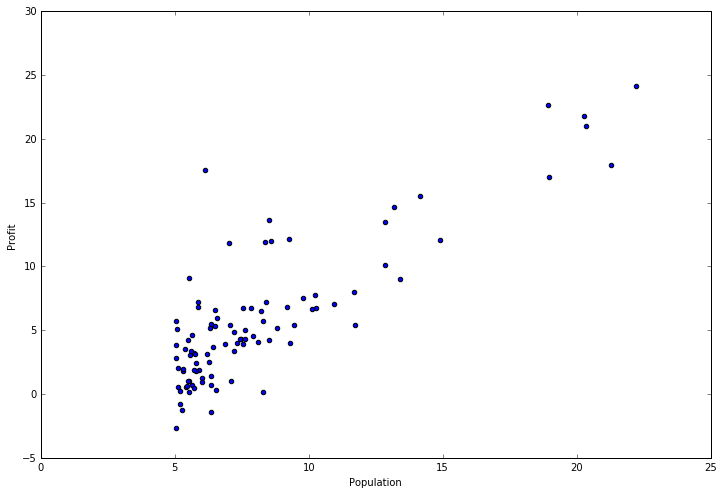

In [162]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [165]:
# create a function to compute the cost of a given solution
# y = X * W^T
# ((X * w^T)- y)^2 = 0

In [164]:
def computeCost(X, y, W):
    inner = np.power(((X * W.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [166]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [168]:
# see what is there in X

In [167]:
X.head()

Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598

In [170]:
# see what is there in y

In [169]:
y.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

In [171]:
X = np.matrix(X.values)
y = np.matrix(y.values)
W = np.matrix(np.array([0,0]))

In [172]:
# see what is there in W

In [173]:
W

matrix([[0, 0]])

In [175]:
X.shape, W.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [177]:
computeCost(X, y, W)

32.072733877455676

In [178]:
# finding the best values for W which satisfies ((X * w^T)- y)^2 = 0

In [179]:
def gradientDescent(X, y, W, alpha, iters):
    temp = np.matrix(np.zeros(W.shape))
    parameters = int(W.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * W.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = W[0,j] - ((alpha / len(X)) * np.sum(term))
            
        W = temp
        cost[i] = computeCost(X, y, W)  
    return W, cost

In [180]:
alpha = 0.01
iters = 1000

In [182]:
final_W, cost = gradientDescent(X, y, W, alpha, iters)
print final_W

[[-3.24140214  1.1272942 ]]


In [184]:
computeCost(X, y, final_W)

4.5159555030789118

In [186]:
# lets visualize what we have learnt

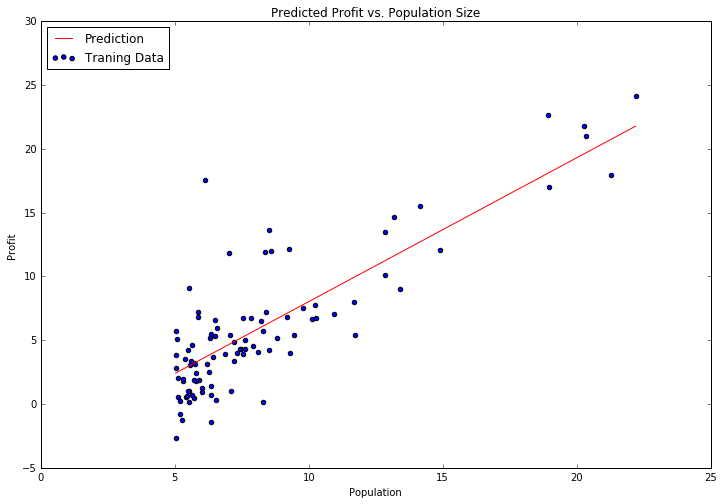

In [187]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = final_W[0, 0] + (final_W[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

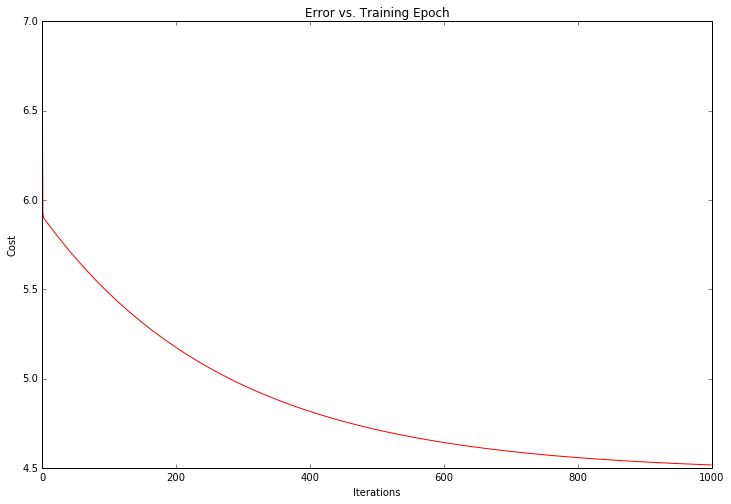

In [188]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Linear regression with multiple variables

In [189]:
# predicting housing price from size of the house in square feet and number of bedrooms

In [193]:
data2 = pd.read_csv('data/linear_Reg_2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

In [194]:
data2 = (data2 - data2.mean()) / data2.std()

# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
W2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
final_W2, cost2 = gradientDescent(X2, y2, W2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, final_W2)

0.13070336960771892

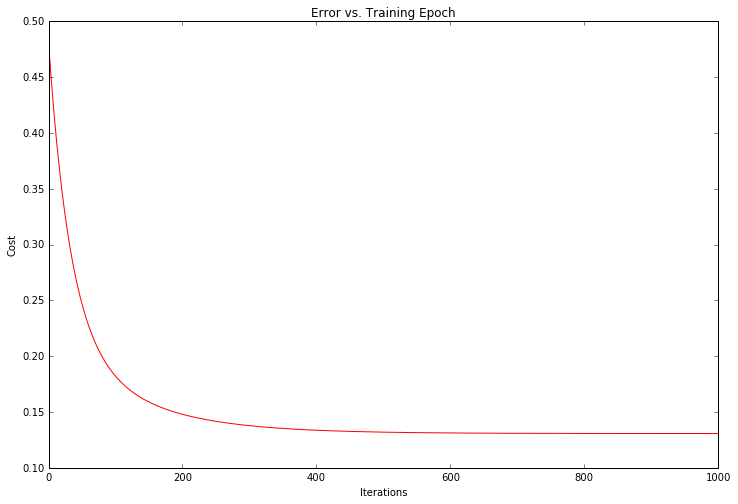

In [195]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# do it in a simple steps - Linear Regression

In [197]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

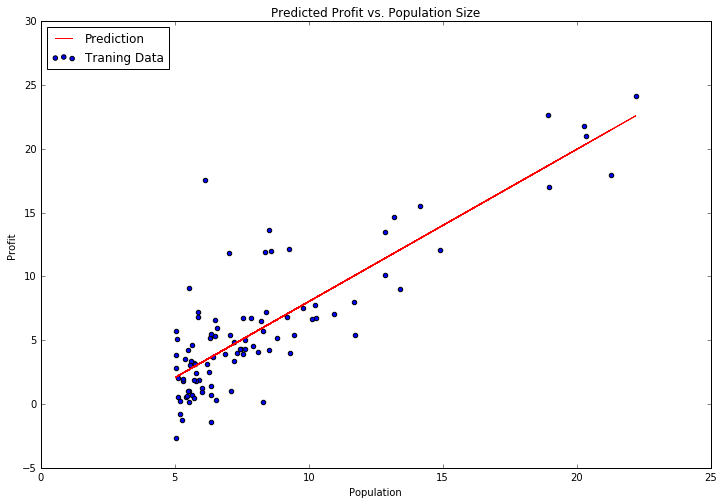

In [198]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [199]:
model.coef_

array([[ 0.        ,  1.19303364]])

In [200]:
model.intercept_

array([-3.89578088])

# Logistics Regression

In [201]:
# predict whether a student gets admitted to a university

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
data = pd.read_csv('data/log_Reg_1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

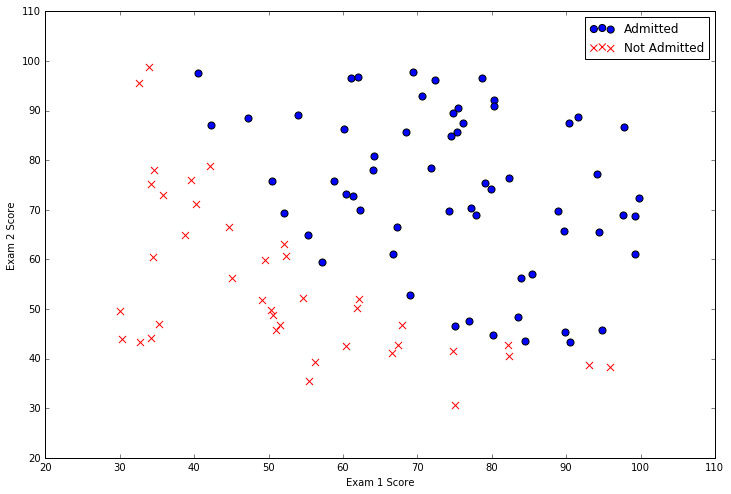

In [204]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [205]:
# create a sigmoid function

In [206]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

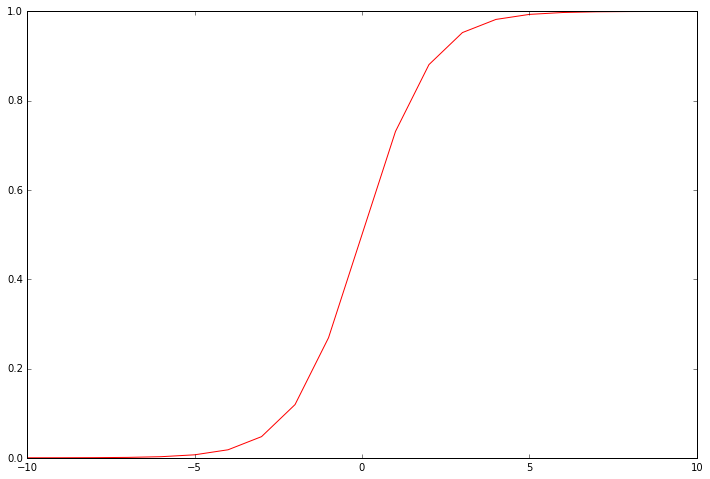

In [207]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [210]:
# measuring cost (error)
# y = sigmoid(X * W.T)
# y - sigmoid(X * W.T)

In [209]:
def cost(W, X, y):
    W = np.matrix(W)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * W.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * W.T)))
    return np.sum(first - second) / (len(X))

In [211]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
W = np.zeros(3)

In [212]:
X.shape, W.shape, y.shape

((100, 3), (3,), (100, 1))

In [213]:
cost(W, X, y)

0.69314718055994529

In [218]:
# finding the best values of W

In [219]:
def gradient(W, X, y):
    W = np.matrix(W)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(W.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * W.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [220]:
gradient(W, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [221]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=W, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [222]:
# prediction for test data

In [225]:
def predict(W, X):
    probability = sigmoid(X * W.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [226]:
W_min = np.matrix(result[0])
predictions = predict(W_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 89%


In [227]:
# do it in a simple steps - Logistic Regression

In [228]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
print('LogisticRegression score: %f'
      % logistic.fit(X, y).score(X, y))

LogisticRegression score: 0.910000


/home/barathiganeshhb/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [229]:
logistic.coef_

array([[-2.85831439,  0.05214733,  0.04531467]])

# Support Vector Machines

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline


In [234]:
# getting data

In [2]:
raw_data = loadmat('data/svm_1.mat')
raw_data

NameError: name 'loadmat' is not defined

visualize it as a scatter plot where the class label is denoted by a symbol (+ for positive, o for negative)

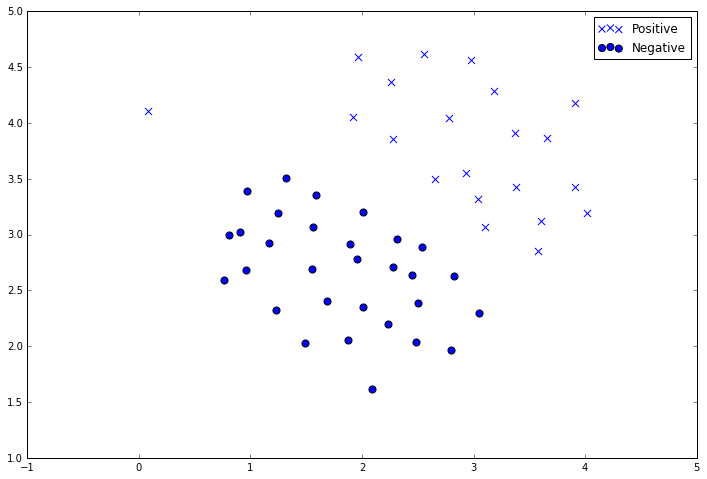

In [237]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

In [238]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [239]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

with a larger value of C

In [242]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data. We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

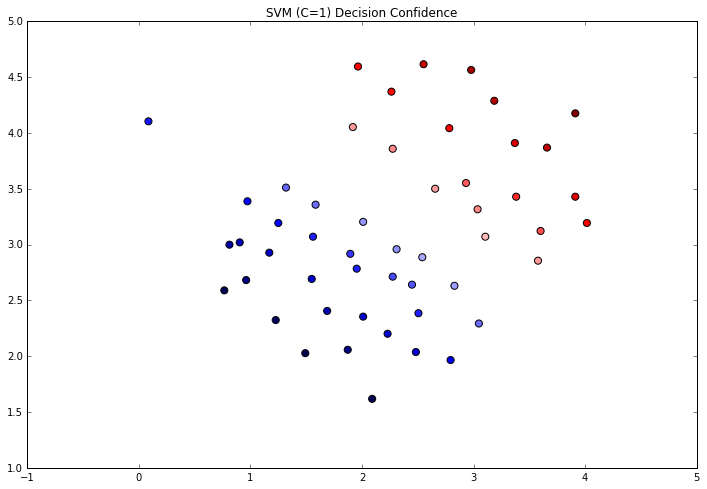

In [243]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

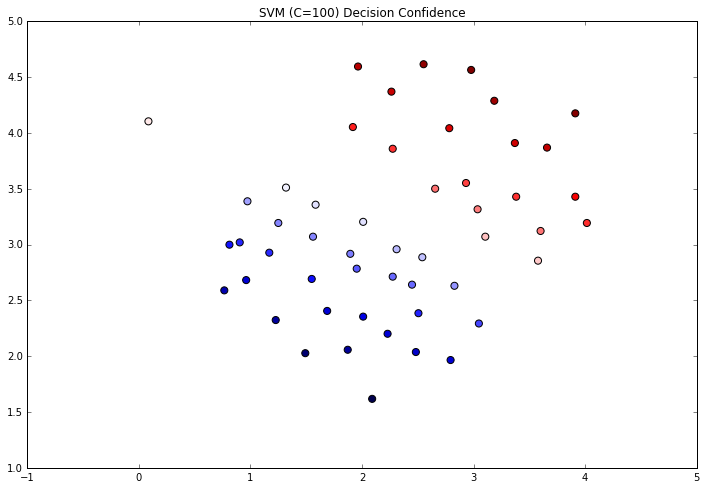

In [244]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')



The difference is a bit subtle but look at the color of the points near the boundary. If you're following along in the exercise text, there's a drawing where the decision boundary is shown as a line on the plot which helps make the difference a bit clearer.

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels. We're first tasked with implementing a gaussian kernel function. Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.


In [245]:
# examine another data set, this time with a non-linear decision boundary.

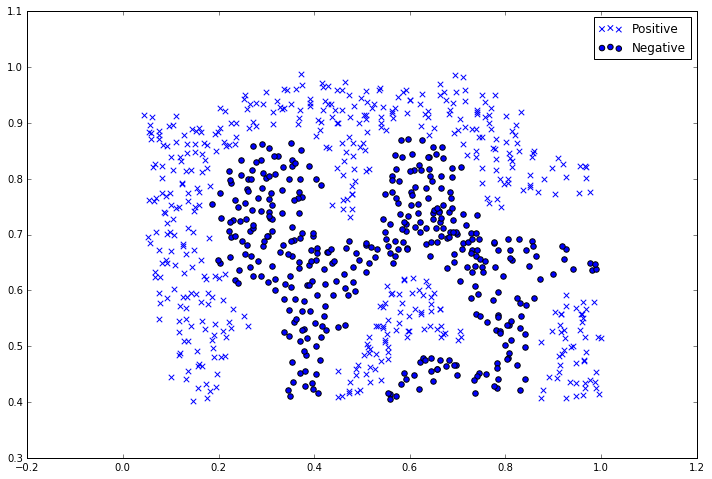

In [246]:
raw_data = loadmat('data/svm_2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

In [247]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [248]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

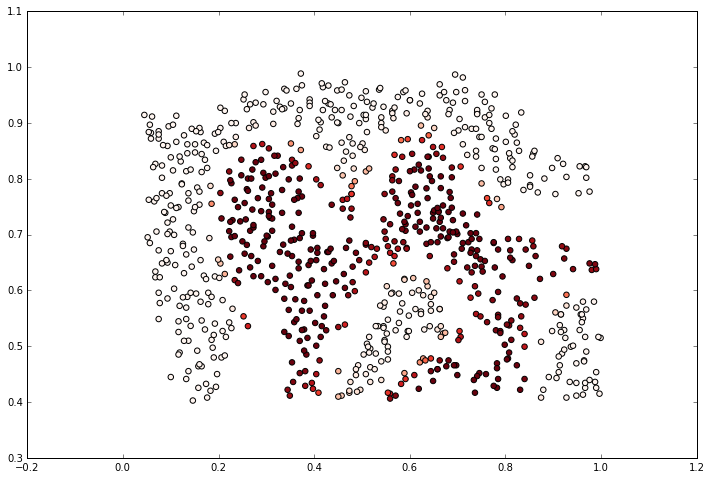

In [249]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')